# MACHINE LEARNING

Question 1:- Explain the difference between AI, ML, Deep learning (DL), and data science(DS).

Answer:- AI (Artificial Intelligence): MAKING MACHINES SMART ENOUGH TO DO TASKS LIKE HUMANS.

ML (Machine Learning): A PART OF AI WHERE MACHINES LEARN FROM DATA AND IMPROVE WITH EXPERIENCE.

DL (Deep Learning): A PART OF ML THAT USES MANY-LAYERED NEURAL NETWORKS, GREAT FOR IMAGES, SPEECH, AND TEXT.

DS (Data Science): WORKING WITH DATA (COLLECTING, ANALYZING, VISUALIZING) TO GET USEFUL INSIGHTS, SOMETIMES USING AI/ML/DL.

Question 2:- What are the types of machine learning ? Describe each with real world examples.

Answer:- Supervised Learning: The machine learns from data that has both questions and answers. Used for predictions like house prices, email spam filter, or loan approval.

Unsupervised Learning: The machine learns from data without answers. It finds hidden patterns or groups. Used for customer segmentation, product recommendations, or fraud detection.

Semi-Supervised Learning: The machine learns from a small amount of answered data and a large amount of unanswered data. Used in medical image analysis or voice recognition.

Reinforcement Learning: The machine learns by trying different actions and getting rewards or penalties. Used in self-driving cars, robots, and game-playing AI.

Question 3:- Define overfitting, underfitting, and the bias-variance trade off in machine learning.

Answer:- Overfitting:- When a model learns too much from the training data, including noise and random details.

It performs very well on training data but poorly on new/unseen data.

Example: A student memorizes past exam answers but cannot solve new questions.

Underfitting:- When a model is too simple and cannot capture the patterns in the data.

It performs poorly on both training data and new data.

Example: A student only studies the basics and cannot answer even the practice questions.

Bias-Variance Trade-off

Bias: Error due to wrong assumptions in the model (too simple). High bias → underfitting.

variance: Error due to too much sensitivity to training data (too complex). High variance → overfitting.

Trade-off: The goal is to find the right balance between bias and variance so the model performs well on both training data and unseen data.

Question 4:- What are outliers in a dataset, and list three common techniques for handling them.

Answer:- Outliers:- Outliers are data points that are very different from the rest of the data.

They can skew analysis or models if not handled properly.

Example: In a dataset of people's ages, most are between 20–60, but one entry is 200 → that’s an outlier.

Three Common Techniques to Handle Outliers

Remove Outliers – Simply delete the extreme data points if they are errors or irrelevant.

Cap or Floor (Winsorization) – Replace extreme values with a maximum or minimum threshold.

Transform the Data – Apply transformations (like log or square root) to reduce the effect of outliers.

Question 5:- Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.

Answer:- Handling Missing Values – Process

Identify missing values in the dataset.

Understand why they are missing (error, not recorded, irrelevant).

Decide whether to:

Remove rows/columns with too many missing values.

Fill (impute) the missing values with reasonable substitutes.

Imputation Techniques

For Numerical Data:

Mean Imputation → Replace missing values with the average of the column.

Example: If ages are [20, 25, NaN, 30], fill NaN with mean = 25 → [20, 25, 25, 30].

For Categorical Data:

Mode Imputation → Replace missing values with the most frequent category.

Example: If colors are [Red, Blue, NaN, Red], fill NaN with mode = Red → [Red, Blue, Red, Red].

Question 6:-

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
from collections import Counter

# Create synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_clusters_per_class=1,
                           weights=[0.9, 0.1], random_state=42)

# Print class distribution
class_distribution = Counter(y)
print("Class distribution:", class_distribution)


Question 7:-

In [ ]:
import pandas as pd

# List of colors
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Create dataframe
df = pd.DataFrame({'Color': colors})

# One-hot encoding
one_hot = pd.get_dummies(df['Color'])

# Combine with original dataframe
result = pd.concat([df, one_hot], axis=1)

print(result)


Question 8:-

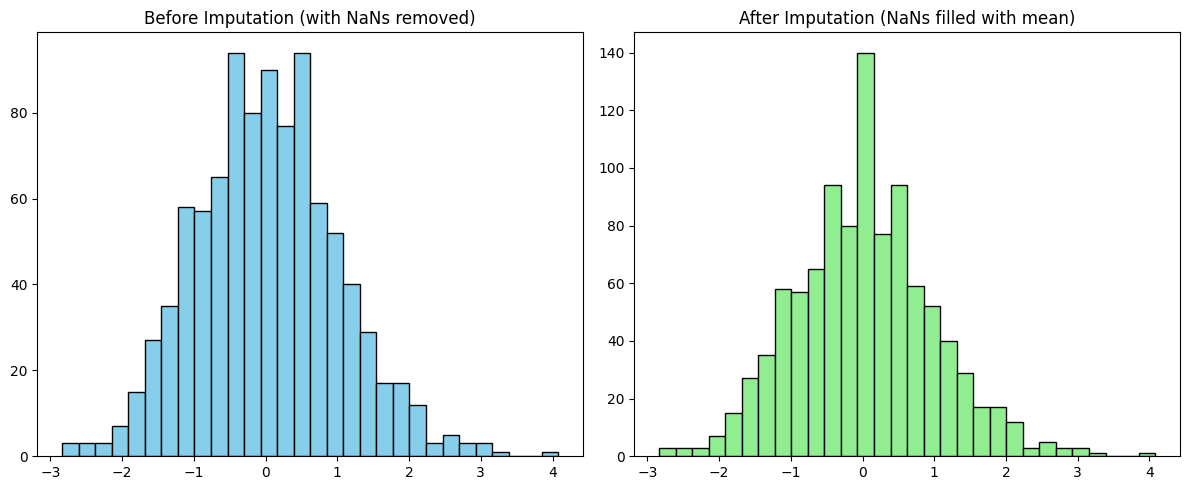

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Generate 1000 samples from a normal distribution
data = np.random.randn(1000)

# Step 2: Introduce 50 random missing values
data_with_nan = data.copy()
missing_indices = np.random.choice(len(data), 50, replace=False)
data_with_nan[missing_indices] = np.nan

# Step 3: Fill missing values with column mean
df = pd.DataFrame(data_with_nan, columns=["values"])
mean_value = df["values"].mean()
df["imputed"] = df["values"].fillna(mean_value)

# Step 4: Plot histograms before and after imputation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df["values"].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Before Imputation (with NaNs removed)")

plt.subplot(1, 2, 2)
plt.hist(df["imputed"], bins=30, color='lightgreen', edgecolor='black')
plt.title("After Imputation (NaNs filled with mean)")

plt.tight_layout()
plt.show()


Question 9:-

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Step 1: Create the data
data = np.array([2, 5, 10, 15, 20]).reshape(-1, 1)

# Step 2: Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Print scaled array
print("Original Data:\n", data.flatten())
print("Scaled Data:\n", scaled_data.flatten())


Original Data:
 [ 2  5 10 15 20]
Scaled Data:
 [0.         0.16666667 0.44444444 0.72222222 1.        ]


Question 10:-

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Example dataset
data = {
    'age': [25, 32, np.nan, 45, 50, np.nan, 29],
    'transaction_amount': [20, 5000, 50, 75, 100000, 60, 45],
    'payment_method': ['card', 'cash', 'upi', 'card', 'cash', 'upi', 'card'],
    'fraud': [0, 1, 0, 0, 1, 0, 0]
}

df = pd.DataFrame(data)

# 1. Handle missing ages (Median Imputation)
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])

# 2. Handle outliers in transaction_amount (Log Transform)
df['transaction_amount'] = np.log1p(df['transaction_amount'])

# 3. Handle categorical variables (OneHotEncoding)
# Use sparse_output=False for sklearn >= 1.2, sparse=False for older versions
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['payment_method']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['payment_method']))
df = pd.concat([df.drop('payment_method', axis=1), encoded_df], axis=1)

# Features and Target
X = df.drop('fraud', axis=1)
y = df['fraud']

# 4. Handle imbalance (SMOTE Oversampling)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 5. Scaling numerical features
scaler = StandardScaler()
X_resampled[['age', 'transaction_amount']] = scaler.fit_transform(
    X_resampled[['age', 'transaction_amount']]
)

# Final outputs
print("Original Class Distribution:\n", y.value_counts())
print("\nAfter SMOTE Resampling:\n", y_resampled.value_counts())
print("\nPrepared Data (first 5 rows):\n", X_resampled.head())
